<a href="https://colab.research.google.com/github/lauren-esser/Exploring_Mental_Health_with_SQL/blob/main/Mental_Health_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtain Data

In [15]:
import sqlite3
import pandas as pd
import seaborn as sns


In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [3]:
#move to home directory
%cd ~
%cd ..


/root
/


In [4]:
#list files in DataSets
!ls '/gdrive/My Drive/Colab Notebooks/DataSets'

chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
cleaningpractice.zip	      mental_health.sqlite
dogs-vs-cats-sorted.zip       ml-latest-small
IVE_tickbidask.txt	      News_Category_Dataset_v2.json


In [5]:
#dataset saved in my google drive
con = sqlite3.connect("/gdrive/My Drive/Colab Notebooks/DataSets/mental_health.sqlite")


In [6]:
#import answer dataset
answer = pd.read_sql('Select * From Answer', con)
answer.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [7]:
#import survey dataset
survey = pd.read_sql('Select * FROM Survey', con)
survey.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [8]:
#import question dataset
question = pd.read_sql('Select * FROM Question', con)
question.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [9]:
#merge question and answer data tables [survey not needed yet]
q_a = pd.read_sql('Select * FROM answer JOIN Question on answer.QuestionID = Question.questionid', con)
q_a.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1


# Scrub Data

In [10]:
#check null
q_a.isna().sum()

AnswerText      0
SurveyID        0
UserID          0
QuestionID      0
questiontext    0
questionid      0
dtype: int64

**Exploring Questions**

In [11]:
print("Number of Questions:", q_a.questionid.nunique())

Number of Questions: 105


In [12]:
q_a.questiontext.value_counts()

What is your age?                                                                                          4218
Are you self-employed?                                                                                     4218
What is your gender?                                                                                       4218
How many employees does your company or organization have?                                                 4218
Have you ever sought treatment for a mental health disorder from a mental health professional?             4218
                                                                                                           ... 
Would you be willing to discuss a mental health issue with your direct supervisor(s)?                      1260
Do you work remotely (outside of an office) at least 50% of the time?                                      1260
Do you think that discussing a mental health issue with your employer would have negative consequences? 

In [13]:
q_a.questiontext[3]

'What is your age?'

In [14]:
print("Number of Unique Users:", q_a.UserID.nunique())

Number of Unique Users: 4218


1. graph of age of people surveyed
2. Graph of gender
3. Map of the country showing what are of the us they live in


Need to look at questions more but would like visuals/responses on mental health questions.Perhaps a word cloud?

In [26]:
age = q_a[q_a.questionid == 1]
age.head()

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1


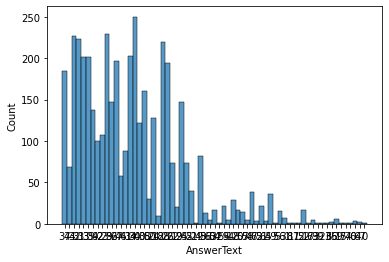

In [33]:
sns.histplot(age.AnswerText, bins = 10);